Files already downloaded and verified
ITER 1
Original Label: 48, Class Name: motorcycle
New Label after Fault Injection: 51, Class Name: mushroom
ITER 2
Original Label: 51, Class Name: mushroom
New Label after Fault Injection: 39, Class Name: keyboard
ITER 3
ITER 4
ITER 5
Original Label: 17, Class Name: castle
New Label after Fault Injection: 51, Class Name: mushroom
ITER 6
Original Label: 39, Class Name: keyboard
New Label after Fault Injection: 51, Class Name: mushroom
ITER 7
ITER 8
Original Label: 51, Class Name: mushroom
New Label after Fault Injection: 39, Class Name: keyboard
ITER 9
ITER 10
Original Label: 7, Class Name: beetle
New Label after Fault Injection: 39, Class Name: keyboard
ITER 11
ITER 12
Original Label: 51, Class Name: mushroom
New Label after Fault Injection: 7, Class Name: beetle
ITER 13
Original Label: 17, Class Name: castle
New Label after Fault Injection: 39, Class Name: keyboard
ITER 14
Original Label: 39, Class Name: keyboard
New Label after Fault Injection: 1

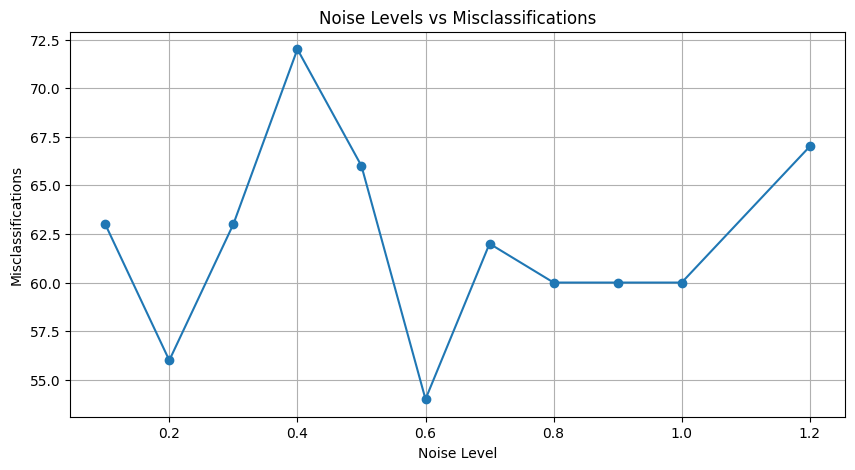

<Figure size 640x480 with 0 Axes>

In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

# Define a custom NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.9):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
# model = torchvision.models.resnet18(pretrained=True)

# model = torchvision.models.vgg16(pretrained=True)
# # Replace the final fully connected layer
# num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
# model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

model.classifier = nn.Linear(model.classifier.in_features, 100)

# model.fc = nn.Linear(model.fc.in_features, 100)

model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


noise_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2]
fi_counts=[]

for nv in noise_values:

    # Main loop for fault injection and prediction
    change_count = 0
    counter=0
    for _ in range(100):
        
        counter+=1
        print("ITER "+str(counter))
        # Randomly select an image and its label from the dataset
        img, label = random.choice(dataset)
    
        # Prepare image for prediction
        img = img.unsqueeze(0).to(device)
    
        # Predict the label with the original model
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
            original_class = dataset.classes[original_predicted.item()]
    
        # Replace ReLU with NoisyReLU
        replace_activations(model, nn.ReLU, NoisyReLU(noise_level=nv))
    
        # Predict the label with the modified model
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
            new_class = dataset.classes[new_predicted.item()]
    
        # Check if the original and new predictions are different
        if original_predicted != new_predicted:
            change_count += 1
            print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
            print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
    
    print(f'Total changes in prediction: {change_count}')
    
    fi_counts.append([nv,change_count])

fi_counts
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Noise Levels vs Misclassifications')  # Title of the plot
plt.xlabel('Noise Level')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-noise-levels.jpg', format='jpg')

Files already downloaded and verified
CURRENT DICT {0.1: 62}
CURRENT DICT {0.1: 62, 0.2: 57}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68, 0.9: 64}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68, 0.9: 64, 1.0: 68}
CURRENT DICT {0.1: 62, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68, 0.9: 64, 1.0: 68, 1.2: 65}
CURRENT DICT {0.1: 122, 0.2: 57, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68, 0.9: 64, 1.0: 68, 1.2: 65}
CURRENT DICT {0.1: 122, 0.2: 117, 0.3: 71, 0.4: 61, 0.5: 62, 0.6: 64, 0.7: 67, 0.8: 68, 0.9: 64, 1.0

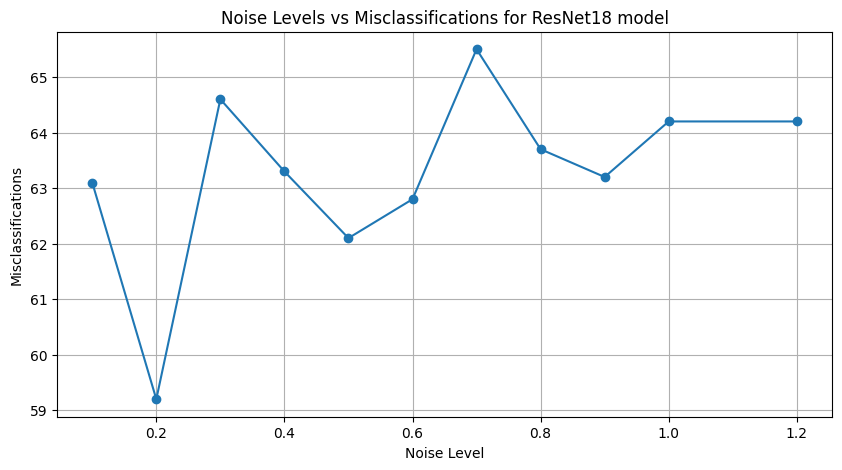

<Figure size 640x480 with 0 Axes>

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

# Define a custom NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.9):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
# model = torchvision.models.densenet121(pretrained=True)
model = torchvision.models.resnet18(pretrained=True)

# model = torchvision.models.vgg16(pretrained=True)
# # Replace the final fully connected layer
# num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
# model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

# model.classifier = nn.Linear(model.classifier.in_features, 100)

model.fc = nn.Linear(model.fc.in_features, 100)

model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


noise_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2]
fi_counts=[]

nv_avg=[]
nv_each=[]

# Create a list to hold the images and labels
image_label_list = []


# Randomly select 100 images and their labels
for _ in range(100):
    img, label = random.choice(dataset)
    image_label_list.append((img, label))
    
my_dict = {}

N=10

for _ in range(N):
    for nv in noise_values:
    
        # Main loop for fault injection and prediction
        change_count = 0
        counter=0
        image_counter=0
        
        for _ in range(100):
            
            counter+=1
            # print("ITER "+str(counter))
            # # Randomly select an image and its label from the dataset
            # img, label = random.choice(dataset)
            # 
            # # Prepare image for prediction
            # img = img.unsqueeze(0).to(device)
            
            img,label =image_label_list[image_counter]
            
            img = img.unsqueeze(0).to(device)
        
            # Predict the label with the original model
            with torch.no_grad():
                outputs = model(img)
                _, original_predicted = torch.max(outputs, 1)
                original_class = dataset.classes[original_predicted.item()]
        
            # Replace ReLU with NoisyReLU
            replace_activations(model, nn.ReLU, NoisyReLU(noise_level=nv))
        
            # Predict the label with the modified model
            with torch.no_grad():
                outputs = model(img)
                _, new_predicted = torch.max(outputs, 1)
                new_class = dataset.classes[new_predicted.item()]
        
            # Check if the original and new predictions are different
            if original_predicted != new_predicted:
                change_count += 1
                # print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
                # print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
                
            image_counter+=1
        
        # print(f'Total changes in prediction: {change_count}')
        
        if (my_dict.__contains__(nv)):
            curr=my_dict.get(nv)
            curr+=change_count
            my_dict[nv]=curr
        else:
            my_dict[nv]=change_count
            
        print("CURRENT DICT",my_dict)
        
        fi_counts.append([nv,change_count])
    
    fi_counts
    
    # print("FI_COUNTS",fi_counts)
    
    # lists = fi_counts
    # summed = [sum(items) for items in zip(*lists)]
    # nv_each = summed
    nv_avg.append(fi_counts)
    
    # print("NV EACH",nv_each)
    # print("NV AVG SO FAR",nv_avg)
    
data = nv_avg

# Transpose the list of lists to group similar indices together
transposed = list(zip(*data))

# Calculate the average of the corresponding elements and reconstruct the desired format
result = [[group[0][0], sum(sub[1] for sub in group) // len(group)] for group in transposed]

fi_counts=result

# print("FINAL NV AVG", nv_avg)

for key in my_dict:
    my_dict[key] /= N

fi_counts= list(my_dict.items())

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Noise Levels vs Misclassifications for ResNet18 model')  # Title of the plot
plt.xlabel('Noise Level')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-noise-levels.png', format='png')

In [10]:
# Flatten the list of lists
flattened_data = [item for sublist in data for item in sublist]

print(flattened_data)

# Dictionary to accumulate sums and counts
average_dict = {}

# Accumulate sums and counts for each key
for key, value in flattened_data:
    if key in average_dict:
        average_dict[key].append(value)
    else:
        average_dict[key] = [value]

# Calculate averages
averages = [[key, sum(values) / len(values)] for key, values in average_dict.items()]
averages.sort()  # Optional, sort by the key for better readability

# Print or return the result
print(averages)

[0.1, 61, 0.2, 57, 0.3, 62, 0.4, 59, 0.5, 67, 0.6, 54, 0.7, 61, 0.8, 58, 0.9, 61, 1.0, 63, 1.2, 59, 0.1, 67, 0.2, 62, 0.3, 62, 0.4, 60, 0.5, 58, 0.6, 57, 0.7, 61, 0.8, 59, 0.9, 63, 1.0, 63, 1.2, 56, 0.1, 65, 0.2, 60, 0.3, 67, 0.4, 52, 0.5, 62, 0.6, 63, 0.7, 50, 0.8, 64, 0.9, 51, 1.0, 57, 1.2, 58, 0.1, 55, 0.2, 61, 0.3, 54, 0.4, 51, 0.5, 50, 0.6, 56, 0.7, 68, 0.8, 61, 0.9, 53, 1.0, 67, 1.2, 62, 0.1, 56, 0.2, 60, 0.3, 59, 0.4, 63, 0.5, 55, 0.6, 59, 0.7, 62, 0.8, 66, 0.9, 54, 1.0, 57, 1.2, 60]


TypeError: cannot unpack non-iterable float object

Files already downloaded and verified
ITER 1
Original Label: 21, Class Name: chimpanzee
New Label after Fault Injection: 19, Class Name: cattle
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
Original Label: 15, Class Name: camel
New Label after Fault Injection: 44, Class Name: lizard
ITER 13
ITER 14
Original Label: 52, Class Name: oak_tree
New Label after Fault Injection: 58, Class Name: pickup_truck
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
Original Label: 6, Class Name: bee
New Label after Fault Injection: 94, Class Name: wardrobe
ITER 21
Original Label: 61, Class Name: plate
New Label after Fault Injection: 6, Class Name: bee
ITER 22
ITER 23
ITER 24
ITER 25
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 93, Class Name: turtle
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
Original Label: 90, Class Name: train
New Label after Fault Injection: 94, Class Name: wardrobe
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37

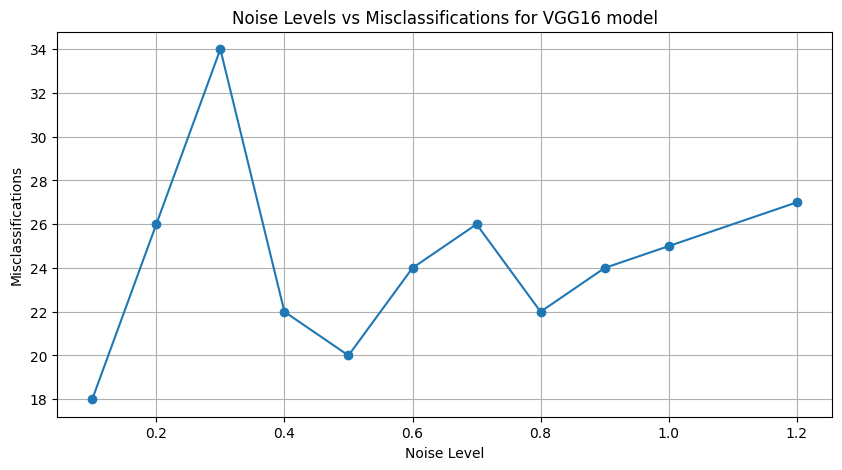

<Figure size 640x480 with 0 Axes>

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

# Define a custom NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.9):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
# model = torchvision.models.densenet121(pretrained=True)
# model = torchvision.models.resnet18(pretrained=True)

model = torchvision.models.vgg16(pretrained=True)
# Replace the final fully connected layer
num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes

# model.classifier = nn.Linear(model.classifier.in_features, 100)

# model.fc = nn.Linear(model.fc.in_features, 100)

model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


noise_values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2]
fi_counts=[]

for nv in noise_values:

    # Main loop for fault injection and prediction
    change_count = 0
    counter=0
    for _ in range(100):
        
        counter+=1
        print("ITER "+str(counter))
        # Randomly select an image and its label from the dataset
        img, label = random.choice(dataset)
    
        # Prepare image for prediction
        img = img.unsqueeze(0).to(device)
    
        # Predict the label with the original model
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
            original_class = dataset.classes[original_predicted.item()]
    
        # Replace ReLU with NoisyReLU
        replace_activations(model, nn.ReLU, NoisyReLU(noise_level=nv))
    
        # Predict the label with the modified model
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
            new_class = dataset.classes[new_predicted.item()]
    
        # Check if the original and new predictions are different
        if original_predicted != new_predicted:
            change_count += 1
            print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
            print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
    
    print(f'Total changes in prediction: {change_count}')
    
    fi_counts.append([nv,change_count])

fi_counts
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Noise Levels vs Misclassifications for VGG16 model')  # Title of the plot
plt.xlabel('Noise Level')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-noise-levels.png', format='png')

Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 93, Class Name: turtle
New Label after Fault Injection: 59, Class Name: pine_tree
ITER 2
Original Label: 90, Class Name: train
New Label after Fault Injection: 59, Class Name: pine_tree
ITER 3
ITER 4
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 93, Class Name: turtle
ITER 5
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 42, Class Name: leopard
ITER 6
ITER 7
ITER 8
ITER 9
Original Label: 57, Class Name: pear
New Label after Fault Injection: 59, Class Name: pine_tree
ITER 10
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 87, Class Name: television
ITER 11
Original Label: 87, Class Name: television
New Label after Fault Injection: 59, Class Name: pine_tree
ITER 12
ITER 13
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 90, Class Name: train
ITER 14
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 87, Class Name: television
ITER 1

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 16, Class Name: can
New Label after Fault Injection: 17, Class Name: castle
ITER 2
Original Label: 9, Class Name: bottle
New Label after Fault Injection: 83, Class Name: sweet_pepper
ITER 3
Original Label: 17, Class Name: castle
New Label after Fault Injection: 35, Class Name: girl
ITER 4
Original Label: 41, Class Name: lawn_mower
New Label after Fault Injection: 18, Class Name: caterpillar
ITER 5
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 94, Class Name: wardrobe
ITER 6
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 22, Class Name: clock
ITER 7
Original Label: 17, Class Name: castle
New Label after Fault Injection: 50, Class Name: mouse
ITER 8
Original Label: 75, Class Name: skunk
New Label after Fault Injection: 17, Class Name: castle
ITER 9
Original Label: 17, Class Name: castle
New Label after Fault Injection: 83, Class Name: sweet_pepper
ITER 10
ITER 11
Original Label: 17, Class Name: castle
N

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 1, Class Name: aquarium_fish
New Label after Fault Injection: 68, Class Name: road
ITER 2
Original Label: 14, Class Name: butterfly
New Label after Fault Injection: 68, Class Name: road
ITER 3
Original Label: 1, Class Name: aquarium_fish
New Label after Fault Injection: 68, Class Name: road
ITER 4
Original Label: 14, Class Name: butterfly
New Label after Fault Injection: 68, Class Name: road
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
Original Label: 68, Class Name: road
New Label after Fault Injection: 14, Class Name: butterfly
ITER 11
Original Label: 68, Class Name: road
New Label after Fault Injection: 14, Class Name: butterfly
ITER 12
ITER 13
Original Label: 14, Class Name: butterfly
New Label after Fault Injection: 68, Class Name: road
ITER 14
ITER 15
ITER 16
Original Label: 68, Class Name: road
New Label after Fault Injection: 14, Class Name: butterfly
ITER 17
Original Label: 14, Class Name: butterfly
New Label after Fault Injection: 68, Class Name: road
ITE

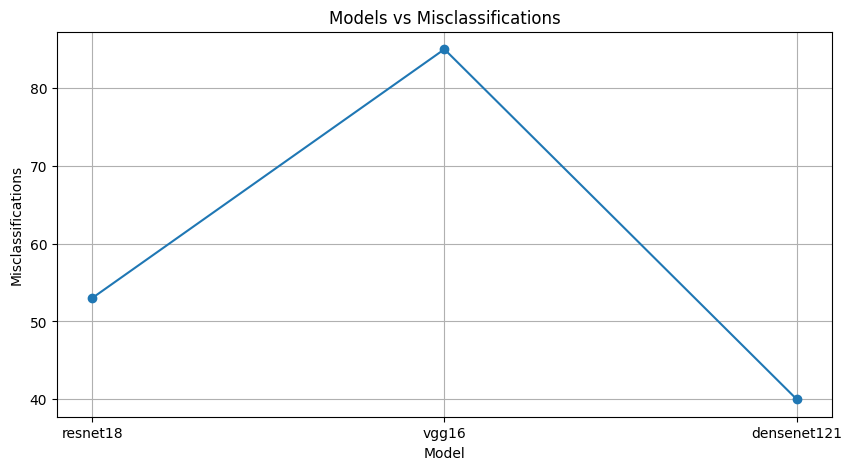

<Figure size 640x480 with 0 Axes>

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

# Define a custom NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.9):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

model_names=['resnet18','vgg16','densenet121']

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


fi_counts=[]

noise_level=(0.3+0.4+0.5)/3

for model_name in model_names:
    
    
    
    if (model_name=='resnet18'):
        model = torchvision.models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 100)
    elif (model_name=='vgg16'):
        model = torchvision.models.vgg16(pretrained=True)
        # Replace the final fully connected layer
        num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
        model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes
    elif (model_name=='densenet121'):
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 100)

    model.to(device)
    model.eval()
    
    
    
    # Main loop for fault injection and prediction
    change_count = 0
    counter=0
    for _ in range(100):
        
        counter+=1
        print("ITER "+str(counter))
        # Randomly select an image and its label from the dataset
        img, label = random.choice(dataset)
    
        # Prepare image for prediction
        img = img.unsqueeze(0).to(device)
    
        # Predict the label with the original model
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
            original_class = dataset.classes[original_predicted.item()]
    
        # Replace ReLU with NoisyReLU
        replace_activations(model, nn.ReLU, NoisyReLU(noise_level=nv))
    
        # Predict the label with the modified model
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
            new_class = dataset.classes[new_predicted.item()]
    
        # Check if the original and new predictions are different
        if original_predicted != new_predicted:
            change_count += 1
            print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
            print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
    
    print(f'Total changes in prediction: {change_count}')
    
    fi_counts.append([model_name,change_count])
    
    print(fi_counts)
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

print(fi_counts)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Models vs Misclassifications')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-model-misclass.jpg', format='jpg')

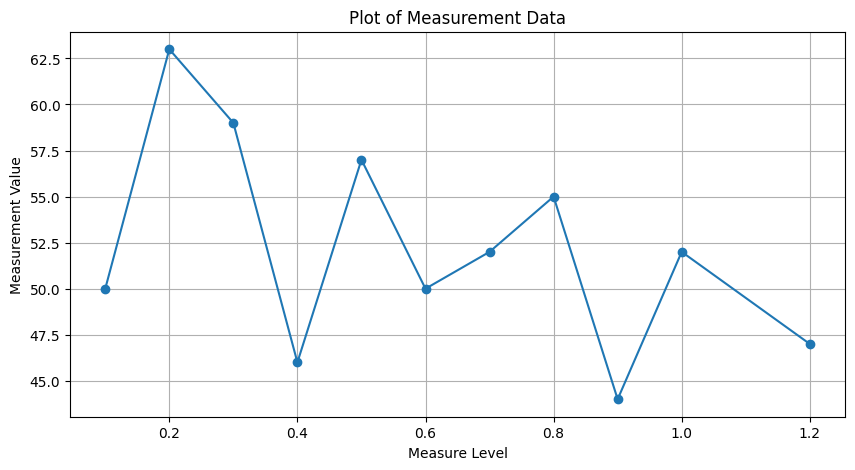

In [46]:
import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Plot of Measurement Data')  # Title of the plot
plt.xlabel('Measure Level')  # X-axis label
plt.ylabel('Measurement Value')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot


In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class RandomizedLeakyReLU(nn.Module):
    def __init__(self, min_negative_slope=0.01, max_negative_slope=0.1):
        super(RandomizedLeakyReLU, self).__init__()
        self.min_negative_slope = min_negative_slope
        self.max_negative_slope = max_negative_slope

    def forward(self, x):
        random_negative_slope = torch.empty(x.size(0)).uniform_(self.min_negative_slope, self.max_negative_slope).to(x.device)
        return F.leaky_relu(x, negative_slope=random_negative_slope)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Main loop for fault injection and prediction
change_count = 0
counter=0
for _ in range(100):
    
    counter+=1
    print("ITER "+str(counter))
    # Randomly select an image and its label from the dataset
    img, label = random.choice(dataset)

    # Prepare image for prediction
    img = img.unsqueeze(0).to(device)

    # Predict the label with the original model
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
        original_class = dataset.classes[original_predicted.item()]
        
    new_activation = nn.LeakyReLU()    

    replace_activations(model, nn.ReLU,new_activation)

    # Predict the label with the modified model
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
        new_class = dataset.classes[new_predicted.item()]

    # Check if the original and new predictions are different
    if original_predicted != new_predicted:
        change_count += 1
        print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
        print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')

print(f'Total changes in prediction: {change_count}')

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)


Files already downloaded and verified
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 0


In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

import torch.nn.functional as F

class RandomizedLeakyReLU(nn.Module):
    def __init__(self, min_negative_slope=0.01, max_negative_slope=0.1):
        super(RandomizedLeakyReLU, self).__init__()
        self.min_negative_slope = min_negative_slope
        self.max_negative_slope = max_negative_slope

    def forward(self, x):
        # random_negative_slope = torch.empty(x.size(0)).uniform_(self.min_negative_slope, self.max_negative_slope).to(x.device)
        random_negative_slope = 0.9
        return F.leaky_relu(x, negative_slope=random_negative_slope)


# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Main loop for fault injection and prediction
change_count = 0
counter=0
for _ in range(100):
    
    counter+=1
    print("ITER "+str(counter))
    # Randomly select an image and its label from the dataset
    img, label = random.choice(dataset)

    # Prepare image for prediction
    img = img.unsqueeze(0).to(device)

    # Predict the label with the original model
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
        original_class = dataset.classes[original_predicted.item()]

    # Replace ReLU with NoisyReLU
    replace_activations(model, nn.ReLU, RandomizedLeakyReLU())

    # Predict the label with the modified model
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
        new_class = dataset.classes[new_predicted.item()]

    # Check if the original and new predictions are different
    if original_predicted != new_predicted:
        change_count += 1
        print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
        print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')

print(f'Total changes in prediction: {change_count}')

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)


Files already downloaded and verified
ITER 1
Original Label: 34, Class Name: fox
New Label after Fault Injection: 14, Class Name: butterfly
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1


Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 82, Class Name: sunflower
New Label after Fault Injection: 49, Class Name: mountain
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1
[['resnet18', 1]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 60, Class Name: plain
New Label after Fault Injection: 51, Class Name: mushroom
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1
[['resnet18', 1], ['vgg16', 1]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 2, Class Name: baby
New Label after Fault Injection: 1, Class Name: aquarium_fish
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1
[['resnet18', 1], ['vgg16', 1], ['densenet121', 1]]
[['resnet18', 1], ['vgg16',

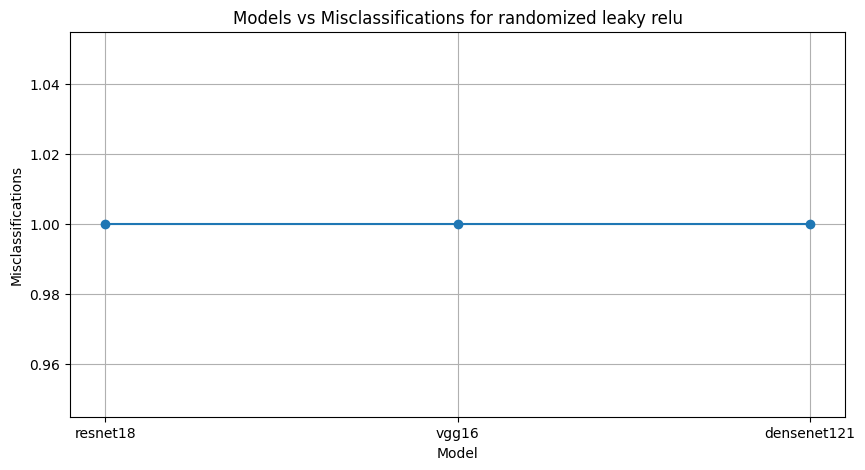

<Figure size 640x480 with 0 Axes>

In [21]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class RandomizedLeakyReLU(nn.Module):
    def __init__(self, min_negative_slope=0.01, max_negative_slope=0.1):
        super(RandomizedLeakyReLU, self).__init__()
        self.min_negative_slope = min_negative_slope
        self.max_negative_slope = max_negative_slope

    def forward(self, x):
        # random_negative_slope = torch.empty(x.size(0)).uniform_(self.min_negative_slope, self.max_negative_slope).to(x.device)
        random_negative_slope = 0.9
        return F.leaky_relu(x, negative_slope=random_negative_slope)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

model_names=['resnet18','vgg16','densenet121']

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


fi_counts=[]

noise_level=(0.3+0.4+0.5)/3

for model_name in model_names:
    
    
    
    if (model_name=='resnet18'):
        model = torchvision.models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 100)
    elif (model_name=='vgg16'):
        model = torchvision.models.vgg16(pretrained=True)
        # Replace the final fully connected layer
        num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
        model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes
    elif (model_name=='densenet121'):
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 100)

    model.to(device)
    model.eval()
    
    
    
    # Main loop for fault injection and prediction
    change_count = 0
    counter=0
    for _ in range(100):
        
        counter+=1
        print("ITER "+str(counter))
        # Randomly select an image and its label from the dataset
        img, label = random.choice(dataset)
    
        # Prepare image for prediction
        img = img.unsqueeze(0).to(device)
    
        # Predict the label with the original model
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
            original_class = dataset.classes[original_predicted.item()]
    
        # Replace ReLU with NoisyReLU
        replace_activations(model, nn.ReLU, RandomizedLeakyReLU())
    
        # Predict the label with the modified model
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
            new_class = dataset.classes[new_predicted.item()]
    
        # Check if the original and new predictions are different
        if original_predicted != new_predicted:
            change_count += 1
            print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
            print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
    
    print(f'Total changes in prediction: {change_count}')
    
    fi_counts.append([model_name,change_count])
    
    print(fi_counts)
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

print(fi_counts)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Models vs Misclassifications for randomized leaky relu')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-model-misclass.jpg', format='jpg')

In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class SaturatedReLU(nn.Module):
    def __init__(self, max_val=0.0001):
        super(SaturatedReLU, self).__init__()
        self.max_val = max_val  # Typical value used in the ReLU6 variant

    def forward(self, x):
        return torch.min(torch.relu(x), torch.tensor(self.max_val).to(x.device))


# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Main loop for fault injection and prediction
change_count = 0
counter=0
for _ in range(100):
    
    counter+=1
    print("ITER "+str(counter))
    # Randomly select an image and its label from the dataset
    img, label = random.choice(dataset)

    # Prepare image for prediction
    img = img.unsqueeze(0).to(device)

    # Predict the label with the original model
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
        original_class = dataset.classes[original_predicted.item()]

    # Replace ReLU with NoisyReLU
    replace_activations(model, nn.ReLU, SaturatedReLU(max_val=0.0001))

    # Predict the label with the modified model
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
        new_class = dataset.classes[new_predicted.item()]

    # Check if the original and new predictions are different
    if original_predicted != new_predicted:
        change_count += 1
        print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
        print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')

print(f'Total changes in prediction: {change_count}')

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)


Files already downloaded and verified
ITER 1
Original Label: 28, Class Name: cup
New Label after Fault Injection: 95, Class Name: whale
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1


In [30]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class DeadReLU(nn.Module):
    def __init__(self, alive_probability=0.9):
        super(DeadReLU, self).__init__()
        self.alive_probability = alive_probability

    def forward(self, x):
        random_mask = (torch.rand_like(x) < self.alive_probability).float()
        return torch.relu(x) * random_mask



# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Main loop for fault injection and prediction
change_count = 0
counter=0
for _ in range(100):
    
    counter+=1
    print("ITER "+str(counter))
    # Randomly select an image and its label from the dataset
    img, label = random.choice(dataset)

    # Prepare image for prediction
    img = img.unsqueeze(0).to(device)

    # Predict the label with the original model
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
        original_class = dataset.classes[original_predicted.item()]

    # Replace ReLU with NoisyReLU
    replace_activations(model, nn.ReLU, DeadReLU(alive_probability=0.7))

    # Predict the label with the modified model
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
        new_class = dataset.classes[new_predicted.item()]

    # Check if the original and new predictions are different
    if original_predicted != new_predicted:
        change_count += 1
        print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
        print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')

print(f'Total changes in prediction: {change_count}')

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)


Files already downloaded and verified
ITER 1
Original Label: 48, Class Name: motorcycle
New Label after Fault Injection: 9, Class Name: bottle
ITER 2
Original Label: 33, Class Name: forest
New Label after Fault Injection: 31, Class Name: elephant
ITER 3
Original Label: 31, Class Name: elephant
New Label after Fault Injection: 33, Class Name: forest
ITER 4
Original Label: 31, Class Name: elephant
New Label after Fault Injection: 20, Class Name: chair
ITER 5
Original Label: 9, Class Name: bottle
New Label after Fault Injection: 31, Class Name: elephant
ITER 6
Original Label: 31, Class Name: elephant
New Label after Fault Injection: 33, Class Name: forest
ITER 7
ITER 8
ITER 9
ITER 10
Original Label: 33, Class Name: forest
New Label after Fault Injection: 31, Class Name: elephant
ITER 11
ITER 12
ITER 13
Original Label: 31, Class Name: elephant
New Label after Fault Injection: 33, Class Name: forest
ITER 14
ITER 15
Original Label: 31, Class Name: elephant
New Label after Fault Injection: 33

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <2BD1B165-EC09-3F68-BCE4-8FE4E70CA7E2> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <F8622D92-25A9-3A61-A089-C917FDA36C1B> /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
ITER 2
Original Label: 26, Class Name: crab
New Label after Fault Injection: 12, Class Name: bridge
ITER 3
Original Label: 74, Class Name: shrew
New Label after Fault Injection: 26, Class Name: crab
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
Original Label: 26, Class Name: crab
New Label after Fault Injection: 12, Class Name: bridge
ITER 9
ITER 10
ITER 11
ITER 12
Original Label: 12, Class Name: bridge
New Label after Fault Injection: 26, Class Name: crab
ITER 13
Original Label: 26, Class Name: crab
New Label after Fault Injection: 12, Class Name: bridge
ITER 14
Original Label: 26, Class Name: crab
New Label after Fault Injection: 12, Class Name: bridge
ITER 15
Original Label: 12, Class Name: bridge
New Label after Fault Injection: 26, Class Name: crab
ITER 16
Original Label: 26, Class Name: crab
New Label after Fault Injection: 12, Class Name: bridge
ITER 17
ITER 18
ITER 19
ITER 20
Original Label: 12, Class Name: bridge
New Label after Fault Injection: 26, Class Name: crab
ITER 21
Origi

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 94, Class Name: wardrobe
New Label after Fault Injection: 4, Class Name: beaver
ITER 2
Original Label: 53, Class Name: orange
New Label after Fault Injection: 52, Class Name: oak_tree
ITER 3
Original Label: 77, Class Name: snail
New Label after Fault Injection: 31, Class Name: elephant
ITER 4
Original Label: 38, Class Name: kangaroo
New Label after Fault Injection: 53, Class Name: orange
ITER 5
Original Label: 79, Class Name: spider
New Label after Fault Injection: 55, Class Name: otter
ITER 6
Original Label: 58, Class Name: pickup_truck
New Label after Fault Injection: 8, Class Name: bicycle
ITER 7
Original Label: 22, Class Name: clock
New Label after Fault Injection: 38, Class Name: kangaroo
ITER 8
Original Label: 79, Class Name: spider
New Label after Fault Injection: 50, Class Name: mouse
ITER 9
Original Label: 22, Class Name: clock
New Label after Fault Injection: 4, Class Name: beaver
ITER 10
Original Label: 79, Class Name: spider
New Label after Fault Inje

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ITER 1
Original Label: 99, Class Name: worm
New Label after Fault Injection: 19, Class Name: cattle
ITER 2
Original Label: 19, Class Name: cattle
New Label after Fault Injection: 94, Class Name: wardrobe
ITER 3
ITER 4
ITER 5
ITER 6
Original Label: 95, Class Name: whale
New Label after Fault Injection: 19, Class Name: cattle
ITER 7
ITER 8
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 19, Class Name: cattle
ITER 9
ITER 10
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 19, Class Name: cattle
ITER 11
Original Label: 19, Class Name: cattle
New Label after Fault Injection: 83, Class Name: sweet_pepper
ITER 12
Original Label: 84, Class Name: table
New Label after Fault Injection: 19, Class Name: cattle
ITER 13
Original Label: 83, Class Name: sweet_pepper
New Label after Fault Injection: 94, Class Name: wardrobe
ITER 14
Original Label: 19, Class Name: cattle
New Label after Fault Injection: 84, Class Name: table
ITER 15
Original La

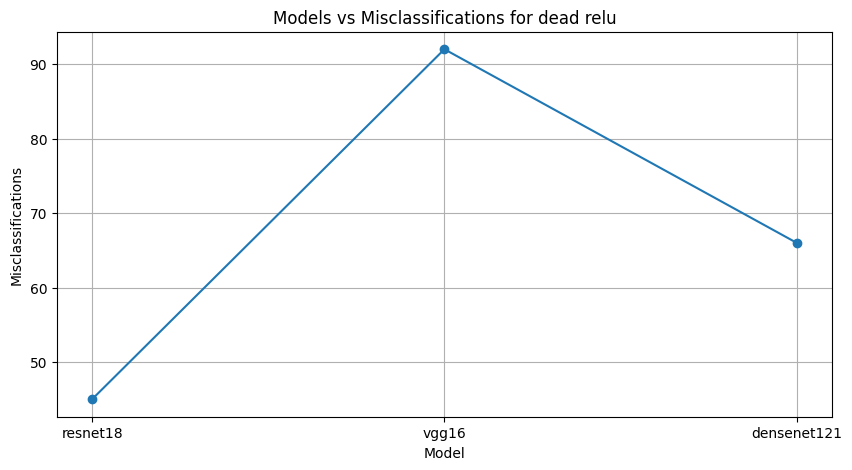

<Figure size 640x480 with 0 Axes>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class DeadReLU(nn.Module):
    def __init__(self, alive_probability=0.5):
        super(DeadReLU, self).__init__()
        self.alive_probability = alive_probability

    def forward(self, x):
        random_mask = (torch.rand_like(x) < self.alive_probability).float()
        return torch.relu(x) * random_mask

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

model_names=['resnet18','vgg16','densenet121']

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


fi_counts=[]

noise_level=(0.3+0.4+0.5)/3

for model_name in model_names:
    
    
    
    if (model_name=='resnet18'):
        model = torchvision.models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 100)
    elif (model_name=='vgg16'):
        model = torchvision.models.vgg16(pretrained=True)
        # Replace the final fully connected layer
        num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
        model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes
    elif (model_name=='densenet121'):
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 100)

    model.to(device)
    model.eval()
    
    
    
    # Main loop for fault injection and prediction
    change_count = 0
    counter=0
    for _ in range(100):
        
        counter+=1
        print("ITER "+str(counter))
        # Randomly select an image and its label from the dataset
        img, label = random.choice(dataset)
    
        # Prepare image for prediction
        img = img.unsqueeze(0).to(device)
    
        # Predict the label with the original model
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
            original_class = dataset.classes[original_predicted.item()]
    
        # Replace ReLU with NoisyReLU
        replace_activations(model, nn.ReLU,DeadReLU())
    
        # Predict the label with the modified model
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
            new_class = dataset.classes[new_predicted.item()]
    
        # Check if the original and new predictions are different
        if original_predicted != new_predicted:
            change_count += 1
            print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
            print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')
    
    print(f'Total changes in prediction: {change_count}')
    
    fi_counts.append([model_name,change_count])
    
    print(fi_counts)
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

print(fi_counts)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Models vs Misclassifications for dead relu')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-model-misclass-relu.jpg', format='jpg')

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

class SigmoidActivation(nn.Module):
    def __init__(self):
        super(SigmoidActivation, self).__init__()

    def forward(self, x):
        return 1 / (1 + torch.exp(-x))



# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Loading DenseNet pretrained model
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
model.to(device)
model.eval()

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# Main loop for fault injection and prediction
change_count = 0
counter=0
for _ in range(100):
    
    counter+=1
    print("ITER "+str(counter))
    # Randomly select an image and its label from the dataset
    img, label = random.choice(dataset)

    # Prepare image for prediction
    img = img.unsqueeze(0).to(device)

    # Predict the label with the original model
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
        original_class = dataset.classes[original_predicted.item()]

    # Replace ReLU with NoisyReLU
    replace_activations(model, nn.ReLU, SigmoidActivation())

    # Predict the label with the modified model
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
        new_class = dataset.classes[new_predicted.item()]

    # Check if the original and new predictions are different
    if original_predicted != new_predicted:
        change_count += 1
        print(f'Original Label: {original_predicted.item()}, Class Name: {original_class}')
        print(f'New Label after Fault Injection: {new_predicted.item()}, Class Name: {new_class}')

print(f'Total changes in prediction: {change_count}')

# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)


Files already downloaded and verified
ITER 1
Original Label: 59, Class Name: pine_tree
New Label after Fault Injection: 66, Class Name: raccoon
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
ITER 11
ITER 12
ITER 13
ITER 14
ITER 15
ITER 16
ITER 17
ITER 18
ITER 19
ITER 20
ITER 21
ITER 22
ITER 23
ITER 24
ITER 25
ITER 26
ITER 27
ITER 28
ITER 29
ITER 30
ITER 31
ITER 32
ITER 33
ITER 34
ITER 35
ITER 36
ITER 37
ITER 38
ITER 39
ITER 40
ITER 41
ITER 42
ITER 43
ITER 44
ITER 45
ITER 46
ITER 47
ITER 48
ITER 49
ITER 50
ITER 51
ITER 52
ITER 53
ITER 54
ITER 55
ITER 56
ITER 57
ITER 58
ITER 59
ITER 60
ITER 61
ITER 62
ITER 63
ITER 64
ITER 65
ITER 66
ITER 67
ITER 68
ITER 69
ITER 70
ITER 71
ITER 72
ITER 73
ITER 74
ITER 75
ITER 76
ITER 77
ITER 78
ITER 79
ITER 80
ITER 81
ITER 82
ITER 83
ITER 84
ITER 85
ITER 86
ITER 87
ITER 88
ITER 89
ITER 90
ITER 91
ITER 92
ITER 93
ITER 94
ITER 95
ITER 96
ITER 97
ITER 98
ITER 99
ITER 100
Total changes in prediction: 1


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import random

# Define NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.1):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return F.relu(x + noise)

# Function to inject noise into the gradients
def inject_faults(parameters, noise_level=0.01):
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                noise = torch.randn_like(param.grad) * noise_level
                # print(param.grad.shape)
                param.grad += noise
                
def inject_faults_vector(parameters, noise_level=0.01):
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                
                
                # Define your desired mean and standard deviation for the noise
                desired_mean = 1  # Mean of the noise
                desired_std = 0.5   # Standard deviation of the noise
                
                # Generate noise with standard normal distribution and scale it
                noise_level = torch.randn_like(param.grad) * desired_std + desired_mean
                
                noise = torch.randn_like(param.grad)+noise_level
                # print(param.grad.shape)
                param.grad += noise

# Load the DenseNet model and adjust for CIFAR100
model = torchvision.models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 100)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Function to replace activation functions in the model
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# replace_activations(model, nn.ReLU, NoisyReLU(noise_level=0.9))

model.train()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

change_counter = 0

# Loop through 100 different random images
for _ in range(100):
    # Randomly select an image and its label from the dataset
    img_idx = random.randint(0, len(dataset) - 1)
    img, label = dataset[img_idx]
    img = img.unsqueeze(0).to(device)
    label = torch.tensor([label], dtype=torch.long, device=device)

    model.eval()
    with torch.no_grad():
        outputs = model(img)
        _, original_predicted = torch.max(outputs, 1)
    
    model.train()
    optimizer.zero_grad()
    outputs = model(img)
    loss = nn.CrossEntropyLoss()(outputs, label)
    loss.backward()
    inject_faults_vector(model.parameters(), noise_level=0.1)
    optimizer.step()
    
    replace_activations(model, nn.ReLU, NoisyReLU(noise_level=0.9))

    model.eval()
    with torch.no_grad():
        outputs = model(img)
        _, new_predicted = torch.max(outputs, 1)
    
    if original_predicted.item() != new_predicted.item():
        change_counter += 1

print(f'Total changes in prediction due to fault injection: {change_counter}')


Files already downloaded and verified
Total changes in prediction due to fault injection: 18


Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total changes in prediction: 87
[['resnet18', 87]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total changes in prediction: 68
[['resnet18', 87], ['vgg16', 68]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total changes in prediction: 91
[['resnet18', 87], ['vgg16', 68], ['densenet121', 91]]
[['resnet18', 87], ['vgg16', 68], ['densenet121', 91]]


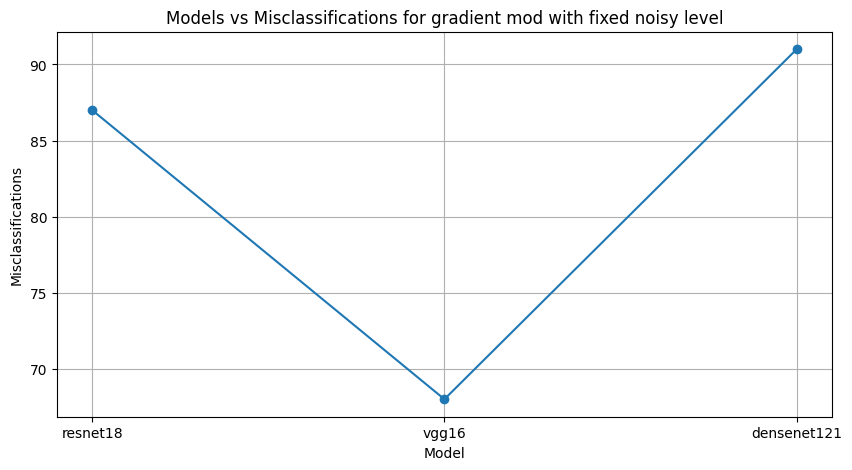

<Figure size 640x480 with 0 Axes>

In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import torch.nn as nn
import random

# Define a custom NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.9):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return torch.relu(x + noise)

# Device configuration
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Transformation for the input data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Loading the dataset
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

model_names=['resnet18','vgg16','densenet121']

# Function to replace activation functions
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)


fi_counts=[]

noise_level=(0.3+0.4+0.5)/3

for model_name in model_names:
    
    
    
    if (model_name=='resnet18'):
        model = torchvision.models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, 100)
    elif (model_name=='vgg16'):
        model = torchvision.models.vgg16(pretrained=True)
        # Replace the final fully connected layer
        num_features = model.classifier[6].in_features  # Access the in_features of the last layer in classifier
        model.classifier[6] = nn.Linear(num_features, 100)  # CIFAR-100 has 100 classes
    elif (model_name=='densenet121'):
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 100)

    model.to(device)
    model.eval()
    
    
    
    # Main loop for fault injection and prediction
    change_counter = 0
    counter=0
    for _ in range(100):
        
        img_idx = random.randint(0, len(dataset) - 1)
        img, label = dataset[img_idx]
        img = img.unsqueeze(0).to(device)
        label = torch.tensor([label], dtype=torch.long, device=device)
    
        model.eval()
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
        
        model.train()
        optimizer.zero_grad()
        outputs = model(img)
        loss = nn.CrossEntropyLoss()(outputs, label)
        loss.backward()
        inject_faults_vector(model.parameters(), noise_level=0.1)
        optimizer.step()
        
        replace_activations(model, nn.ReLU, NoisyReLU(noise_level=noise_level))
    
        model.eval()
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
        
        if original_predicted.item() != new_predicted.item():
            change_counter += 1
        
    print(f'Total changes in prediction: {change_counter}')
    
    fi_counts.append([model_name,change_counter])
    
    print(fi_counts)
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

print(fi_counts)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Models vs Misclassifications for gradient mod with fixed noisy level')  # Title of the plot
plt.xlabel('Model')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-model-misclass-grad.jpg', format='jpg')

Files already downloaded and verified


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total changes in prediction due to fault injection: 19
Total changes in prediction due to fault injection: 17
Total changes in prediction due to fault injection: 14
Total changes in prediction due to fault injection: 20


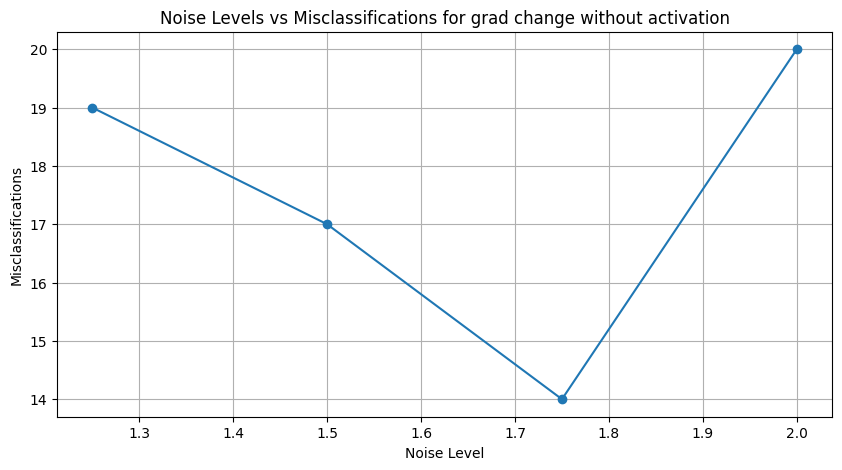

<Figure size 640x480 with 0 Axes>

In [34]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import random

# Define NoisyReLU activation function
class NoisyReLU(nn.Module):
    def __init__(self, noise_level=0.1):
        super(NoisyReLU, self).__init__()
        self.noise_level = noise_level

    def forward(self, x):
        noise = torch.randn_like(x) * self.noise_level
        return F.relu(x + noise)

# Function to inject noise into the gradients
def inject_faults(parameters, noise_level=0.01):
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                noise = torch.randn_like(param.grad) * noise_level
                # print(param.grad.shape)
                param.grad += noise
                
def inject_faults_vector(parameters, noise_level=0.01):
    with torch.no_grad():
        for param in parameters:
            if param.grad is not None:
                
                
                # Define your desired mean and standard deviation for the noise
                desired_mean = 1  # Mean of the noise
                desired_std = 0.5   # Standard deviation of the noise
                
                # Generate noise with standard normal distribution and scale it
                noise_level = torch.randn_like(param.grad) * desired_std + desired_mean
                
                noise = torch.randn_like(param.grad)+noise_level
                # print(param.grad.shape)
                param.grad += noise

# Load the DenseNet model and adjust for CIFAR100
# model = torchvision.models.densenet121(pretrained=True)
# model.classifier = nn.Linear(model.classifier.in_features, 100)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model.to(device)

# Function to replace activation functions in the model
def replace_activations(model, old, new):
    for name, module in model.named_children():
        if isinstance(module, old):
            setattr(model, name, new)
        else:
            replace_activations(module, old, new)

# replace_activations(model, nn.ReLU, NoisyReLU(noise_level=0.9))

model.train()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# nv_levels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
# nv_levels=[0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2]
nv_levels=[1.25,1.5,1.75,2]

fi_counts=[]

for nv in nv_levels:
    
    
    # model = torchvision.models.densenet121(pretrained=True)
    # model.classifier = nn.Linear(model.classifier.in_features, 100)
    # device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # model.to(device)

    change_counter = 0
    
    # Loop through 100 different random images
    for _ in range(100):
        # Randomly select an image and its label from the dataset
        img_idx = random.randint(0, len(dataset) - 1)
        img, label = dataset[img_idx]
        img = img.unsqueeze(0).to(device)
        label = torch.tensor([label], dtype=torch.long, device=device)
        
        model = torchvision.models.densenet121(pretrained=True)
        model.classifier = nn.Linear(model.classifier.in_features, 100)
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model.to(device)
    
        model.eval()
        with torch.no_grad():
            outputs = model(img)
            _, original_predicted = torch.max(outputs, 1)
        
        model.train()
        optimizer.zero_grad()
        outputs = model(img)
        loss = nn.CrossEntropyLoss()(outputs, label)
        loss.backward()
        inject_faults_vector(model.parameters(), noise_level=nv)
        optimizer.step()
        
        # replace_activations(model, nn.ReLU, NoisyReLU(noise_level=0.9))
    
        model.eval()
        with torch.no_grad():
            outputs = model(img)
            _, new_predicted = torch.max(outputs, 1)
        
        if original_predicted.item() != new_predicted.item():
            change_counter += 1
    
    print(f'Total changes in prediction due to fault injection: {change_counter}')
    
    fi_counts.append([nv,change_counter])

fi_counts
# Reset model to original state if needed
# replace_activations(model, NoisyReLU, nn.ReLU)

import matplotlib.pyplot as plt

# Given data
data = fi_counts

# Unpacking the data into x and y coordinates
x = [point[0] for point in data]
y = [point[1] for point in data]

# Creating the plot
plt.figure(figsize=(10, 5))  # Set the figure size (optional)
plt.plot(x, y, marker='o')  # Plot the points with a line and circle markers
plt.title('Noise Levels vs Misclassifications for grad change without activation')  # Title of the plot
plt.xlabel('Noise Level')  # X-axis label
plt.ylabel('Misclassifications')  # Y-axis label
plt.grid(True)  # Enable grid for easier readability
plt.show()  # Show the plot

plt.savefig('plot-noise-levels.jpg', format='jpg')
